# Исследовательский проект
Романюк Анастасия Алексеевна

Фадеева Анна Александровна

БПИ 225

# **Часть 1**

Формирование датасета:

Данные были получены на портале Kaggle.com

[Psycological Effects of COVID](https://www.kaggle.com/datasets/hemanthhari/psycological-effects-of-covid)

Данные для датасета были собраны в 2020 году, во время пандемии.

**Значения колонок:**

**age** - возрастная группа

**gender** - гендер

**occupation** - профессия/сектор, где работает человек

**time_bp** - время, потраченное на работу до пандемии (в часах)

**time_dp** - время, потраченное на работу во время пандемии (в часах)

**travel_time** - сколько времени человек тратил на дорогу до работы (в часах)

**easeof_online** - насколько легко работать онлайн (по шкале от 1 до 5)

**home_env** - насколько человеку нравится домашняя обстановка (по шкале от 1 до 5)

**prod_inc** - оценка увеличения производительности (от -1 до 1 с шагом 0.5, число отрицательное, если производительность уменьшилась)

**sleep_bal** - оценка улучшения качества сна (от -1 до 1 с шагом 0.5, число отрицательное, если сон ухудшился)

**new_skill** - оценка того, появились ли у человека какие-либо новые навыки (от -1 до 1 с шагом 0.5, число отрицательное, если человек потерял навыки)

**fam_connect** - оценка улучшения связи с семьей (от -1 до 1 с шагом 0.5, число отрицательное, если отношения в семье ухудшились)

**relaxed** - оценка того, насколько расслебленым себя чувствует человек (от -1 до 1 с шагом 0.5, число отрицательное, если человек стал чувствовать себя более напряженно)

**self_time** - оценка того, сколько времени человек стал выделять на себя (от -1 до 1 с шагом 0.5, число отрицательное, если человек стал уделять себе меньше времени)

**like_hw** - насколько человеку нравится работать из дома (по шкале от 1 до 15)

**dislike_hw** - насколько человеку не нравится работать из дома (по шкале от 1 до 15)

**prefer** - человек предпочитает работать из дома или в офисе

**certaindays_hw** - хочет ли человек в некоторые дни работать из дома ( yes/no/maybe)

P.S. в колонках, где значения находятся в диапазоне от -1 до 1 с шагом 0.5 -1 - "показатель сильно уменьшился", -0.5 - "показатель немного уменьшился", 0 - "показатель не изменился", 0.5 - "показатель немного увеличился", 1 - "показатель сильно увеличился".

In [ ]:
import pandas as pd
df = pd.read_csv('psyco.csv')
df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN


Колонки line_of_work, travel+work и Unnamed пустые, либо модержат > 50% пропусков, поэтому их мы удалим:

In [ ]:
df = df.drop(columns=['line_of_work', 'travel+work', 'Unnamed: 19'])
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,time_bp.1
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,7
1,Dec-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,7
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,7
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,7
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,7


Колонка time_bp.1 является дубликатом колонки time_bp, поэтому ее тоже удаляем.

In [ ]:
df = df.drop(columns=['time_bp.1'])
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


Авторы датасета пишут, что при его создании возникли проблемы с кодировкой, и некоторые переменные отображаются как бинарные и находятся в двоичном диапазоне. Для удобства дальнейшей работы перекодируем их в десятичную шкалу:

In [ ]:
def convert1(row):
  return int(row['like_hw'], 2)
df['like_hw'] = df['like_hw'].astype(str)
df['like_hw'] = df.apply (convert1, axis=1)

In [ ]:
def convert2(row):
  return int(row['dislike_hw'], 2)
df['dislike_hw'] = df['dislike_hw'].astype(str)
df['dislike_hw'] = df.apply (convert2, axis=1)

Также в колонке age присутствует ошибка - вместо возрастной группы 0-18 записано Dec-18, исправим это:

In [ ]:
def convert3(row):
  if(row['age'] == "Dec-18"):
    return '0-18'
  else:
    return row['age']
df['age'] = df.apply (convert3, axis=1)
df

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,4,1,Complete Physical Attendance,Yes
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,15,14,Complete Physical Attendance,No
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,12,7,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,4,15,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,10,8,Complete Physical Attendance,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,2,1,Complete Physical Attendance,Yes
1171,26-32,Female,Homemaker,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,4,7,Complete Physical Attendance,Maybe
1172,26-32,Male,Working Professional,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,15,6,Complete Physical Attendance,Maybe
1173,26-32,Male,Working Professional,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,15,12,Complete Physical Attendance,Yes


Описание датасета:

In [ ]:
print("Число строк в датасете: ", df.shape[0])
print("Число столбцов в датасете: ", df.shape[1])

Число строк в датасете:  1175
Число столбцов в датасете:  18


In [ ]:
print("Типы данных в колонках:")
df.dtypes

Типы данных в колонках:


age                object
gender             object
occupation         object
time_bp             int64
time_dp             int64
travel_time       float64
easeof_online       int64
home_env            int64
prod_inc          float64
sleep_bal         float64
new_skill         float64
fam_connect       float64
relaxed           float64
self_time         float64
like_hw             int64
dislike_hw          int64
prefer             object
certaindays_hw     object
dtype: object

Типы данных в столбцах подходящие, изменение не требуется.

In [ ]:
print("Число пустых значениий в каждом столбце:")
df.isnull().sum ()

Число пустых значениий в каждом столбце:


age               0
gender            0
occupation        0
time_bp           0
time_dp           0
travel_time       0
easeof_online     0
home_env          0
prod_inc          0
sleep_bal         0
new_skill         0
fam_connect       0
relaxed           0
self_time         0
like_hw           0
dislike_hw        0
prefer            0
certaindays_hw    0
dtype: int64

**Переменные:**

**age** - категориальная, порядковая

**gender** - категориальная, номинальная(male, female, prefer not to say)

**occupation** - категориальная, номинальная

**time_bp** - метрическая

**time_dp** - метрическая

**travel_time** - метрическая

**easeof_online** - категориальная, порядковая

**home_env** - категориальная, порядковая

**prod_inc** - категориальная, порядковая

**sleep_bal** - категориальная, порядковая

**new_skill** - категориальная, порядковая

**fam_connect** - категориальная, порядковая

**relaxed** - категориальная, порядковая

**self_time** - категориальная, порядковая

**like_hw** - категориальная, порядковая

**dislike_hw** - категориальная, порядковая

**prefer** - категориальная, бинарная

**certaindays_hw** - категориальная, номинальная

Создадим новую переменную free_time_dif: на основе столбцов travel_time, time_bp, time_dp, отражающую (в часах) разницу между количеством свободного времени у человека до пандемии и во время нее, учитывая время, затрачиваемое на дорогу до работы.

Значение в столбце будет отрицательным, если у человека стало меньше свободного времени.

In [ ]:
def f(row):
  return row['travel_time']*2 + row['time_bp'] - row['time_dp']

df['free_time_dif'] = df.apply (f, axis=1)
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,free_time_dif
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,4,1,Complete Physical Attendance,Yes,3.0
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,15,14,Complete Physical Attendance,No,-3.0
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,12,7,Complete Physical Attendance,Yes,3.0
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,4,15,Complete Physical Attendance,Yes,3.0
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,10,8,Complete Physical Attendance,Yes,3.0


Перекодируем метрическую переменную travel_time в категориальную. Новая переменная будет отражать, насколько долго человек добирался до работы.

**Разделение:**

от 0.5 до 1 часа - Near

от 1 до 2 часов - Medium

более 2 часов - Far

Создадим для новой переменной столбец work_dist

In [ ]:
import pandas as pd
arr = []
for i in range(0, df.shape[0]):
  if df.iat[i, 5] < 1:
    arr.append("Near")
  elif df.iat[i, 5] < 2:
    arr.append("Medium")
  else:
    arr.append("Far")
df['work_dist'] = arr
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,free_time_dif,work_dist
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,4,1,Complete Physical Attendance,Yes,3.0,Near
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,15,14,Complete Physical Attendance,No,-3.0,Near
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,12,7,Complete Physical Attendance,Yes,3.0,Medium
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,4,15,Complete Physical Attendance,Yes,3.0,Medium
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,10,8,Complete Physical Attendance,Yes,3.0,Medium


**Цель исследования:**

  Изучение и анализ влияния пандемии COVID-19 и удаленной работы в частности на ментальное состояние людей и их образ жизни.

**Задачи ииследования:**

1.   Проверка гипотез: исследовать влияние домашней обстановки, возраста,удаленности от работы и т.д. на различные аспекты жизни во время пандемии, такие как изменение продуктивности, количество свободного времени, улучшение отношений в семье.
2.   Визуализация данных: построить графики для выявления взаимосвязей между переменными.
3.   Исследование взаимодействия факторов: оценить влияние взаимодействия факторов на изменение состояние человека во время пандемии и периода самоизоляции.
4. Построение и анализ моделей линейной и бинарной регрессии: выявить и описать взаимосвязи между различными предикторами и зависимой переменной.


**Исследовательские гипотезы:**

**H1 -** существует зависимость между тем, насколько человеку нравится домашняя обстановка и насколько легко ему работать или учиться онлайн.

**H2 -** чем больше человеку нравится домашняя обстановка, тем больше времени он начал уделять себе.

**H3 -** увеличение уровня продуктивности ведет к появлению новых навыков.

**H4 -** старшее поколение людей(50+) не хотело бы иногда работать из дома.

**H5 -** люди, живущие далеко от работы в большинстве своем предпочитают оффлайн работу или учебу.

**H6 -** школьники и студенты больше всех хотят работать из дома.

**H7 -** мужчины предпочитают работать онлайн, а женщины - в офисе.

**H8 -** существует зависимость между полом человека и тем, как изменились отношения в его семье.

**H9 -** если отношения в семье человека улучшаются, он начинает меньше работать.

**H10 -** время работы во время пандемии никак не влияет на приобретение человеком новых навыков.

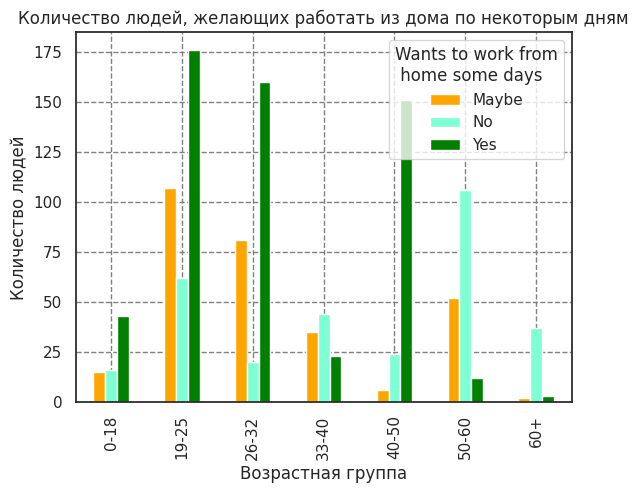

In [ ]:
import matplotlib.pyplot as plt
df.groupby('age')['certaindays_hw'].value_counts().unstack().plot(kind='bar', color=['orange', 'aquamarine', 'green'])
plt.title('Количество людей, желающих работать из дома по некоторым дням')
plt.legend( title='Wants to work from\n home some days')
plt.ylabel('Количество людей')
plt.xlabel('Возрастная группа')
plt.grid(color = 'grey',linewidth = 1,linestyle = '--')
plt.show()

Наиболее выраженное желание иногда работать удаленно наблюдается у возрастных групп 19-25 лет, 26-32 года и 40-50 лет. Наибольшими противниками работы из дома являются люди возратной категории 50-60. Почти все опрошенные из возрасной группы 60+ также не хотят иногда работать из дома.

Гипотеза H4 подтверждена.

(array([0, 1, 2]),
 [Text(0, 0, 'Far'), Text(1, 0, 'Medium'), Text(2, 0, 'Near')])

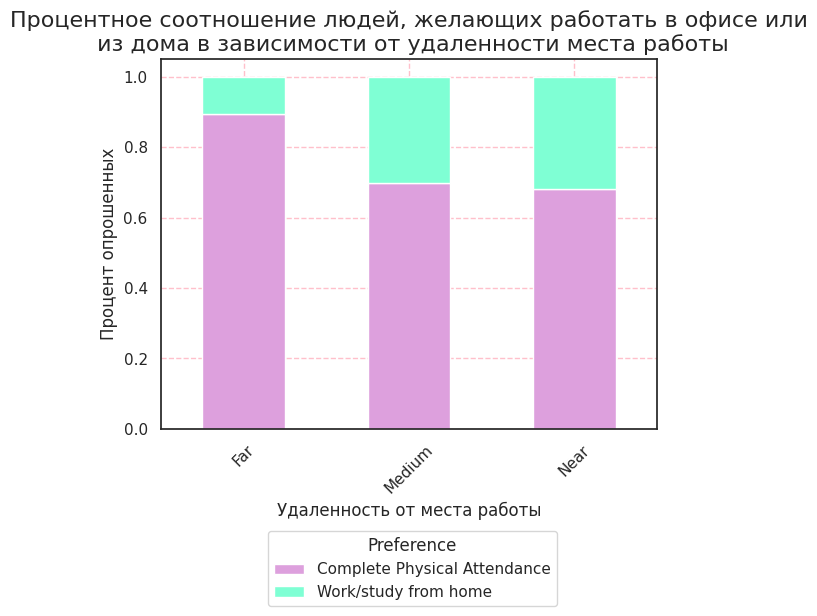

In [ ]:
import seaborn as sns

sns.set(style='white')

df.groupby('work_dist')['prefer'].value_counts(normalize = True).unstack().plot(kind='bar', stacked= True , color=['plum', 'aquamarine'])
plt.legend(title='Preference',loc='lower left', bbox_to_anchor=(0.2, -0.5))

plt.title('Процентное соотношение людей, желающих работать в офисе или\n из дома в зависимости от удаленности места работы', fontsize= 16 )

plt.xlabel('Удаленность от места работы')
plt.ylabel('Процент опрошенных')
plt.grid(color = 'pink',linewidth = 1,linestyle = '--')
plt.xticks (rotation = 45 )

Вне зависимости от удаленности места работы, большинство людей предпочитают оффлайн работу или учебу. При этом процент людей, желающих работать из дома среди людей, путь до работы у котрых занимает 2 и менее часа, примерно одинаков, а среди живущих далеко от работы людей этот процент значительно меньше.

Гипотеза H5 опровергнута.

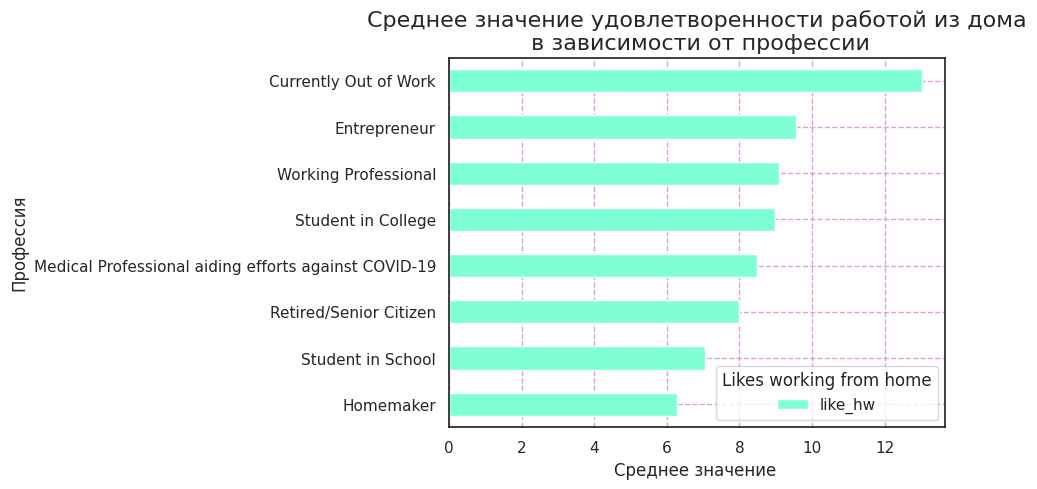

In [ ]:
df.groupby("occupation")["like_hw"].mean().sort_values().plot(kind="barh", color='aquamarine', fontsize=11)
plt.legend(title='Likes working from home', loc='lower right')
plt.title('Среднее значение удовлетворенности работой из дома\n в зависимости от профессии', fontsize= 16 )

plt.xlabel('Среднее значение ')
plt.ylabel('Профессия')
plt.grid(color = 'plum',linewidth = 1,linestyle = '--')

График показывает, что больше всего оставаться дома нравится безработным людям. Из людей, имеющих работу в среднем удаленный режим более всего нравится предпринимателям, менее всего - домохозяйкам.

Гипотеза Н6 опровергнута.

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Prefer not to say')])

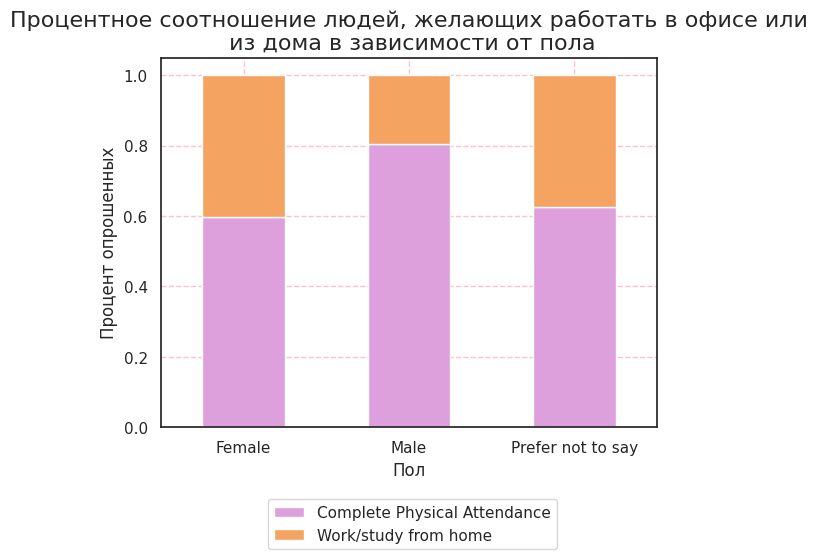

In [ ]:
sns.set(style='white')

df.groupby('gender')['prefer'].value_counts(normalize = True).unstack().plot(kind='bar', stacked= True ,  color=['plum', 'sandybrown'])
plt.legend(loc='lower left', bbox_to_anchor=(0.2, -0.35))

plt.title('Процентное соотношение людей, желающих работать в офисе или\n из дома в зависимости от пола', fontsize= 16 )

plt.xlabel('Пол')
plt.ylabel('Процент опрошенных')
plt.grid(color = 'pink',linewidth = 1,linestyle = '--')
plt.xticks (rotation = 0 )

Вне зависимости от пола большинство людей предпочитают оффлайн работу или учебу. Среди мужчин процент желающих физически присутствовать на месте работы или учебы больше, чем среди женщин.

Гипотеза Н7 опровергнута.

Для удобства построения графика создадим дополнительную категориальную переменную fam_dif, отражающую улучшились, ухудшились или не изменились ли у человека отношения в семье.

In [ ]:
arr = []
for i in range(0, df.shape[0]):
  if df.iat[i, 11] < 0:
    arr.append("Worse")
  elif df.iat[i,11] == 0:
    arr.append("Nothing changed")
  else:
    arr.append("Better")
df['fam_dif'] = arr
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,free_time_dif,work_dist,fam_dif
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,1.0,-0.5,-0.5,4,1,Complete Physical Attendance,Yes,3.0,Near,Better
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,1.0,1.0,1.0,15,14,Complete Physical Attendance,No,-3.0,Near,Better
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,0.5,0.5,0.5,12,7,Complete Physical Attendance,Yes,3.0,Medium,Better
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,0.0,-1.0,-0.5,4,15,Complete Physical Attendance,Yes,3.0,Medium,Nothing changed
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,0.0,0.5,0.0,10,8,Complete Physical Attendance,Yes,3.0,Medium,Nothing changed


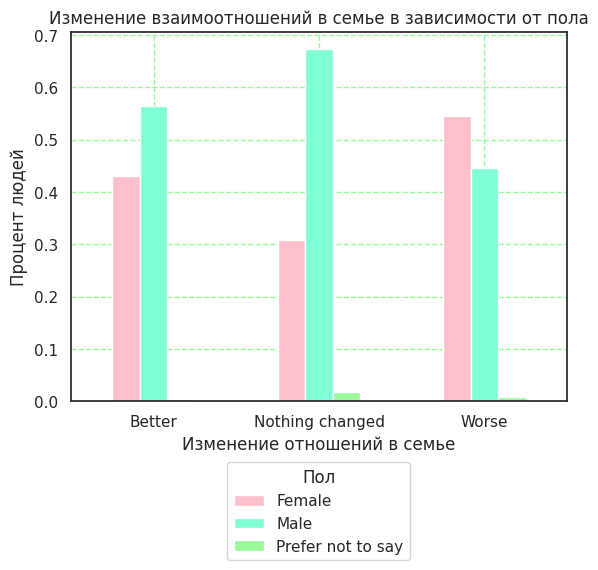

In [ ]:
import matplotlib.pyplot as plt
df.groupby('fam_dif')['gender'].value_counts(normalize=True).unstack().plot(kind='bar', color=['pink', 'aquamarine', 'palegreen'])
plt.title('Изменение взаимоотношений в семье в зависимости от пола')
plt.legend( title='Пол',loc='lower left', bbox_to_anchor=(0.3, -0.45) )
plt.ylabel('Процент людей')
plt.xlabel('Изменение отношений в семье')
plt.grid(color = 'palegreen',linewidth = 1,linestyle = '--')
plt.xticks (rotation = 0 )
plt.show()

Среди людей, отношения в семье у которых улучшились или остались прежними процент мужчин выше, чем женщин, а среди тех, чьи отношения с семьей ухудшились, напротив, больше женщин, чем мужчин. Наиболее выраженное различие наблюдается среди гендерного состава людей, в семье которых ничего не изменилось - примерно 30% это женщины и почти 70% - мужчины.

Гипотеза Н8 подтверждена.

In [ ]:
df.groupby('home_env')[['easeof_online']].median()

,easeof_online
home_env,
1,1.0
2,2.0
3,3.0
4,4.0
5,3.0


Чем лучше  у человека обстановка дома, тем проще ему работать онлайн, за исключением тех, кто оценивет обстановку у себя дома наивысшим баллом - для них примерно средняя простота работы из дома.

Гипотеза Н1 подтверждена.

In [ ]:
df.groupby('self_time')[['like_hw']].median()

,like_hw
self_time,
-1.0,8.0
-0.5,6.0
0.0,9.0
0.5,9.0
1.0,12.0


Чем больше времени человек стал себе уделять времени, тем больше ему нравится работать из дома. Меньше всех нравится работать дома тем, кто стал немного меньше заботиться о себе.

Гипотеза H2 подтверждена.

In [ ]:
df.groupby('prod_inc')[['new_skill']].median()

,new_skill
prod_inc,
-1.0,0.0
-0.5,-0.5
0.0,0.5
0.5,0.5
1.0,0.5


Те кто считают, что их продуктивность увеличилась или осталась на прежнем уровне, в основном получили новые навыки. У людей которые говорят, что их продуктивность уменьшилась очень сильно навыки остались на прежнем уровне. А те, кто немного уменьшил продуктивность, в основном потеряли какие-то навыки.

Гипотеза Н3 подтверждена.

H0 - между 'home_env' и 'easeof_online' существует зависимость



In [ ]:
from scipy import stats
ct_home_online= pd.crosstab(df['home_env'], df['easeof_online'])
print('chi2 = ', stats.chi2_contingency(ct_home_online)[0], '   p-value =', stats.chi2_contingency(ct_home_online)[1])

chi2 =  605.4349067143893    p-value = 1.608563101817018e-118


p-value < 0.01 Гипотеза H0 принимается на уровне значимости 1%


H0 - между 'self_time' и 'like_hw' существует зависимость

In [ ]:
ct_self_likehw= pd.crosstab(df['self_time'], df['like_hw'])
print('chi2 = ', stats.chi2_contingency(ct_self_likehw)[0], '   p-value =', stats.chi2_contingency(ct_self_likehw)[1])

chi2 =  569.2585807294668    p-value = 4.5576939740357225e-86


p-value < 0.01 Гипотеза H0 принимается на уровне значимости 1%

H0 - между 'prod_inc' и 'new_skill' существует зависимость

In [ ]:
ct_prod_skill= pd.crosstab(df['prod_inc'], df['new_skill'])
print('chi2 = ', stats.chi2_contingency(ct_prod_skill)[0], '   p-value =', stats.chi2_contingency(ct_prod_skill)[1])

chi2 =  510.41894936586397    p-value = 2.098021496955836e-98


p-value < 0.01 Гипотеза H0 принимается на уровне значимости 1%

В датасете всего 4 метрические переменные, рассчитаем описателные статистики и корреляции, используя их.

Описательные статистики:

In [ ]:
df[['time_bp',	'time_dp',	'travel_time', 'free_time_dif']].describe()

,time_bp,time_dp,travel_time,free_time_dif
count,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,1.498723
std,2.005385,2.657007,0.713314,3.184790
min,4.000000,4.000000,0.500000,-6.000000
25%,5.000000,5.000000,0.500000,-1.000000
50%,7.000000,9.000000,0.500000,1.000000
75%,9.000000,9.000000,1.500000,4.000000
max,12.000000,12.000000,3.000000,10.000000


**Медианные значения:**

Времени, потраченного на работу до пандемии - **7.4 часа**

Времени, потраченного на работу во время пандемии - **8 часов**

Времени, которое человек тратил на дорогу до работы - **1 час**

Разницы количества свободного времени до пандемии и во время нее - **1.5 часа**

**Стандартное отклонение:**

Времени, потраченного на работу до пандемии - **2 часа**

Времени, потраченного на работу во время пандемии - **2.7 часов**

Времени, которое человек тратил на дорогу до работы - **0.7 часа**

Разницы количества свободного времени до пандемии и во время нее - **3.2 часа**

**Минимальные/максимальные значения:**

Времени, потраченного на работу до пандемии - **4 часа/ 12 часов**

Времени, потраченного на работу во время пандемии - **4 часа/ 12 часов**

Времени, которое человек тратил на дорогу до работы - **0.5 часа/ 3 часа**

Разницы количества свободного времени до пандемии и во время нее - **-6 часов/ 10 часов**

Рассчитаем корреляции между метрическими переменными:

In [ ]:
df[['time_bp',	'time_dp',	'travel_time', 'free_time_dif']].corr()

,time_bp,time_dp,travel_time,free_time_dif
time_bp,1.000000,0.355643,0.299816,0.467273
time_dp,0.355643,1.000000,0.118609,-0.557210
travel_time,0.299816,0.118609,1.000000,0.537784
free_time_dif,0.467273,-0.557210,0.537784,1.000000


Метрические переменные между собой слабо коррелируют, только у free_time_dif коэф корреляции примерно 0.5 по модулю с остальными переменными, что объясняется тем, что переменная была рассчитана с использованием остальных.

**Построение модели линейной регрессии:**

In [ ]:
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
#Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений


Датасет не содержит пропусков.

In [ ]:
# Выберем зависимой переменной time_dp
df['time_dp'].describe()

count    1175.000000
mean        7.971915
std         2.657007
min         4.000000
25%         5.000000
50%         9.000000
75%         9.000000
max        12.000000
Name: time_dp, dtype: float64

<Axes: xlabel='time_dp', ylabel='Density'>

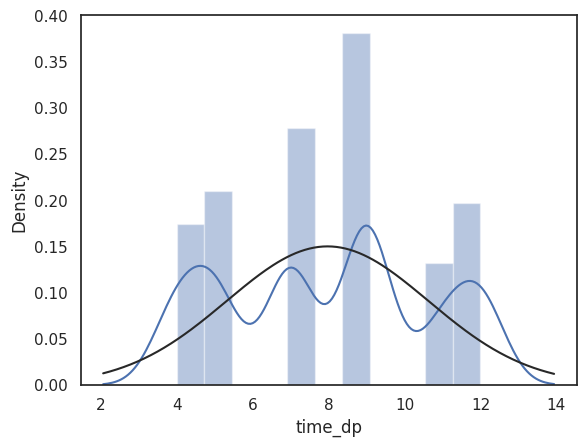

In [ ]:
sns.distplot(df['time_dp'], fit=stats.norm)

free_time_dif не распределена номально, имеет несколько локальных экстремумов. Глобальный максимум расположен близко к максимуму нормального распеределения.

In [ ]:
#Не уверена, что нужно, уже делалаи раньше похожее
print('Skewness: {:.4f}'.format(df['time_dp'].skew()))
print('Kurtosis: {:.4f}'.format(df['time_dp'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['time_dp'].quantile(0.75) - df['time_dp'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['time_dp'].quantile(0.9)/df['time_dp'].quantile(0.1)))

Skewness: 0.0117
Kurtosis: -1.1920
Quartile Deviation: 2.0000
Decile Ratio: 3.0000


In [ ]:
stats.kstest(df['time_dp'], 'norm', args=(df['time_dp'].mean(), df['time_dp'].std()))

KstestResult(statistic=0.16804408718051944, pvalue=1.7928441396171657e-29, statistic_location=9, statistic_sign=-1)

Перекодируем дамми-переменные


In [ ]:
df['prefer'].value_counts()

Complete Physical Attendance    836
Work/study from home            339
Name: prefer, dtype: int64

In [ ]:
prefer_dummies=pd.get_dummies(df['prefer'], prefix='prefer', prefix_sep='_')
prefer_dummies

,prefer_Complete Physical Attendance,prefer_Work/study from home
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1170,1,0
1171,1,0
1172,1,0
1173,1,0


In [ ]:
df = pd.concat([df, prefer_dummies], axis=1)

In [ ]:
df['fam_connect'].value_counts()

 0.5    414
 1.0    326
-1.0    181
 0.0    162
-0.5     92
Name: fam_connect, dtype: int64

In [ ]:
fam_connect_dummies=pd.get_dummies(df['fam_connect'], prefix='fam_connect', prefix_sep='_')
df = pd.concat([df, fam_connect_dummies], axis=1)

In [ ]:
df['new_skill'].value_counts()

 0.5    366
-0.5    249
 1.0    236
 0.0    202
-1.0    122
Name: new_skill, dtype: int64

In [ ]:
new_skill_dummies=pd.get_dummies(df['new_skill'], prefix='new_skill', prefix_sep='_')
df = pd.concat([df, new_skill_dummies], axis=1)

In [ ]:
import statsmodels.api as sm

In [ ]:
# Зависимая переменная time_dp и перекодированные(если нужно) предикторы time_bp, travel_time,
#prefer, fam_connect, new_skill
df_model = df.dropna(subset=['time_dp','time_bp', 'travel_time',
                      'prefer_Complete Physical Attendance', #prefer_Work/study from home - реф группа
                      'fam_connect_-1.0', 'fam_connect_-0.5',
                      'fam_connect_0.5', 'fam_connect_1.0', #fam_connect_0.0 - реф группа
                      'new_skill_1.0', 'new_skill_0.5',
                      'new_skill_-1.0', 'new_skill_-0.5'# new_skill_0.0 - реф группа
                       ])

df_model.shape

(1175, 33)

In [ ]:
x_mult = df_model[['time_bp', 'travel_time',
                      'prefer_Complete Physical Attendance',
                      'fam_connect_-1.0', 'fam_connect_-0.5',
                      'fam_connect_0.5', 'fam_connect_1.0',
                      'new_skill_1.0', 'new_skill_0.5',
                      'new_skill_-1.0', 'new_skill_-0.5']]
y = df_model['time_dp']
x_mult_constant = sm.add_constant(x_mult)

In [ ]:
model = sm.OLS(y, x_mult_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                time_dp   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     58.94
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          6.76e-104
Time:                        11:53:13   Log-Likelihood:                -2554.6
No. Observations:                1175   AIC:                             5133.
Df Residuals:                    1163   BIC:                             5194.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
from scipy.stats.mstats import zscore
model2 = sm.OLS(zscore(y), zscore(x_mult)).fit() #Стандартизируем значения
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                time_dp   R-squared (uncentered):                   0.358
Model:                            OLS   Adj. R-squared (uncentered):              0.352
Method:                 Least Squares   F-statistic:                              58.99
Date:                Sun, 25 Feb 2024   Prob (F-statistic):                   5.44e-104
Time:                        11:53:13   Log-Likelihood:                         -1406.9
No. Observations:                1175   AIC:                                      2836.
Df Residuals:                    1164   BIC:                                      2892.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [ ]:
print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))

R^2 = 0.357951
F-test significance = 0.000000


Объясняется 35.8% значений зависимой переменной, модель статистически значима.

Все предикторы статистически значимы (p-val < 0.05)

*   **time_bp** при увеличении времени работы до пандемии на 1 час, время работы во время пандемии в среднем увеличится на 0.5322 часа.
*   **travel_time** при увеличении времени,пораченного на поездку до работы на 1 час, время работы во время пандемии в среднем увеличится на 0.2969 часа.
*   **prefer_Complete Physical Attendance** Люди,которые предпочитают работать всё рабочее время на рабочем месте в среднем на 0.7084 часа работают меньше во время панедемии по сравнению с людьми, которые предпочитают работать из дома.
*   **fam_connect_-1.0** Люди, у которых отношения в семье сильно ухудшились во время пандемии в среднем на 0.6562 часа работают больше во время пандемии по сравнению с людьми, у которых взаимоотношения в семье остались на прежнем уровне.
*   **fam_connect_-0.5** Люди, у которых отношения в семье немного ухудшились во время пандемии в среднем на 2.0898 часа работают больше во время пандемии по сравнению с людьми, у которых взаимоотношения в семье остались на прежнем уровне.
*   **fam_connect_0.5** Люди, у которых отношения в семье немного улучшились во время пандемии в среднем на 1.1408 часа работают меньше во время пандемии по сравнению с людьми, у которых взаимоотношения в семье остались на прежнем уровне.
*   **fam_connect_1.0** Люди, у которых отношения в семье немного улучшились во время пандемии в среднем на 1.0253 часа работают меньше во время пандемии по сравнению с людьми, у которых взаимоотношения в семье остались на прежнем уровне.
*   **new_skill_1.0** Люди, которые преобрели очень много новых навыков во время пандемии в среднем на 1.0992 часа работают больше во время пандемии по сравнению с людьми, у которых навыки остались на прежнем уровне.
*   **new_skill_0.5** Люди, которые преобрели немного новых навыков во время пандемии в среднем на 1.0459 часа работают больше во время пандемии по сравнению с людьми, у которых навыки остались на прежнем уровне.
*   **new_skill_-0.5** Люди, которые потеряли немного навыков во время пандемии в среднем на 2.2250 часа работают больше во время пандемии по сравнению с людьми, у которых навыки остались на прежнем уровне.
*   **new_skill_-1.0** Люди, которые потеряли очень много навыков во время пандемии в среднем на 0.6787 часа работают больше во время пандемии по сравнению с людьми, у которых навыки остались на прежнем уровне.

Гипотеза Н9 подтверждена.

Гипотеза Н10 опровергнута.

Из стандартизированных значений видим, что больше всего на время работы во время пандемии влияет время работы до пандемии.

Durbin-Watson = 1.805, значит, нет проблемы гетероскедастичности.

Распределение остатков близко к нормальному.

<Axes: ylabel='Density'>

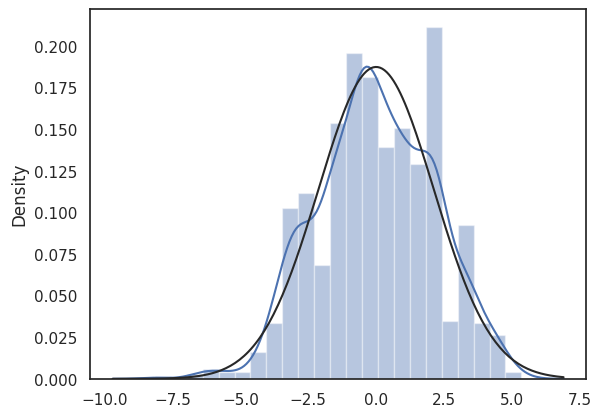

In [ ]:
sns.distplot(model.resid, fit=stats.norm)

Остатки расперделены близко к нормальному.

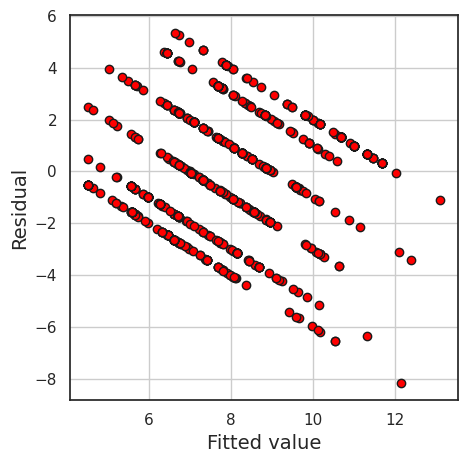

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='red', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

Наблюдается гомоскедастичность

In [ ]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
1,1.178616,travel_time
2,1.220338,prefer_Complete Physical Attendance
0,1.258035,time_bp
4,1.578307,fam_connect_-0.5
9,1.973461,new_skill_-1.0
10,1.985597,new_skill_-0.5
8,2.415602,new_skill_0.5
3,2.430488,fam_connect_-1.0
7,2.699739,new_skill_1.0
5,2.701740,fam_connect_0.5


Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

In [ ]:
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_time_bp,dfb_travel_time,dfb_prefer_Complete Physical Attendance,dfb_fam_connect_-1.0,dfb_fam_connect_-0.5,dfb_fam_connect_0.5,dfb_fam_connect_1.0,dfb_new_skill_1.0,dfb_new_skill_0.5,dfb_new_skill_-1.0,dfb_new_skill_-0.5,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.004976,0.001946,0.023974,-0.018940,-0.002956,-0.007361,0.010600,-0.046775,0.026750,-0.032763,-0.005147,-0.006392,5.831678e-04,-0.819364,0.010316,-0.083654,-0.819248,-0.083642
1,0.014321,-0.020590,-0.082216,0.037448,-0.124310,-0.012539,0.030537,0.159119,-0.112436,-0.032621,0.241557,0.030885,9.527338e-03,2.187190,0.023341,0.338124,2.190760,0.338676
2,-0.000078,-0.000626,0.000811,0.000644,0.000189,0.000169,0.000513,-0.000206,0.000329,0.000842,-0.000038,-0.000084,4.410088e-07,0.035149,0.004265,0.002300,0.035134,0.002299
3,-0.013503,0.007564,-0.015293,-0.007143,0.021278,0.020528,0.043236,0.033128,-0.012851,-0.030659,-0.002992,-0.006878,2.416804e-04,-0.501125,0.011417,-0.053853,-0.500963,-0.053836
4,-0.000529,0.000137,-0.000219,-0.000062,0.000380,0.000380,0.000467,0.000476,0.000216,0.000348,0.000241,0.000372,6.670187e-08,-0.009342,0.009087,-0.000895,-0.009338,-0.000894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,-0.002023,0.002409,-0.001459,0.000693,-0.001024,-0.000398,0.002231,0.000905,-0.000125,-0.001365,0.000628,0.002631,2.759774e-06,0.060291,0.009028,0.005755,0.060265,0.005752
1171,0.076104,-0.044281,0.000351,0.029530,-0.108458,-0.105043,-0.120185,-0.088713,0.022034,0.028598,0.040799,0.099517,3.281412e-03,1.934553,0.010412,0.198436,1.936840,0.198671
1172,-0.034893,0.041070,-0.046422,0.030363,0.002521,0.015627,0.026280,0.000268,0.015834,0.032024,-0.003936,-0.005942,9.757470e-04,1.549985,0.004850,0.108208,1.550921,0.108273
1173,-0.006638,0.035146,0.004724,-0.001978,0.079906,0.014198,0.008496,-0.001488,-0.026298,-0.041269,-0.090501,-0.059041,1.347684e-03,1.033875,0.014904,0.127170,1.033905,0.127174


In [ ]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
#потенциальные влияющие наблюдения

Series([], Name: dffits, dtype: float64)

Потенциальных влияющих наблюдений нет.

In [ ]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
#потенциальные выбросы

50    -3.870845
78    -3.104817
394   -3.097115
Name: standard_resid, dtype: float64

Стандартизированные остатки указанных выше кейсов сильно выбиваются из диапазона (-3, 3) => кейсы с  номерами 50, 78, 394 - потенциальные выбросы.

In [ ]:
df.loc[[50, 78, 394]]

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,fam_connect_-1.0,fam_connect_-0.5,fam_connect_0.0,fam_connect_0.5,fam_connect_1.0,new_skill_-1.0,new_skill_-0.5,new_skill_0.0,new_skill_0.5,new_skill_1.0
50,19-25,Male,Student in College,12,4,0.5,5,5,-1.0,-1.0,...,0,1,0,0,0,1,0,0,0,0
78,33-40,Male,Working Professional,9,4,0.5,2,3,-0.5,-0.5,...,0,1,0,0,0,1,0,0,0,0
394,50-60,Male,Currently Out of Work,11,4,1.5,2,4,0.0,-0.5,...,0,0,1,0,0,1,0,0,0,0


Такие выбросы могли появиться из за того, что у человека либо поменялась область работы на более простую и меньшей занятостью,либо из-за уменьшения нагрузки из-за перехода в онлайн и он не поддерживал уже ранее полученные навыки.

**Бинарная регрессия**

В качестве зависимой переменной возьмём prefer (человек больше любит работать полностью оффлайн или работать из дома). Переменная уже перекодирована в бинарную prefer_Complete Physical Attendance.

1 - предпочитает оффлайн

0 - предпочитает работу из дома

В качестве предиктров мы выбрали метрическую переменную time_bp и категориальные self_time,  relaxed, new_skill и home_env

In [ ]:
df['self_time'].value_counts() #референтная гр 0.0

 0.0    417
 0.5    289
-0.5    252
 1.0    148
-1.0     69
Name: self_time, dtype: int64

In [ ]:
df['certaindays_hw'].value_counts() #референтная гр Yes

Yes      568
No       309
Maybe    298
Name: certaindays_hw, dtype: int64

In [ ]:
df['home_env'].value_counts() #референтная гр 3

3    327
2    309
1    215
4    200
5    124
Name: home_env, dtype: int64

In [ ]:
self_time_dummies=pd.get_dummies(df.self_time, prefix='self_time', prefix_sep='_')
certaindays_hw_dummies=pd.get_dummies(df.certaindays_hw, prefix='certaindays_hw', prefix_sep='_')
home_env_dummies=pd.get_dummies(df.home_env, prefix='home_env', prefix_sep='_')
df = pd.concat([df, self_time_dummies, certaindays_hw_dummies, home_env_dummies], axis=1)

In [ ]:
df

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,self_time_0.5,self_time_1.0,certaindays_hw_Maybe,certaindays_hw_No,certaindays_hw_Yes,home_env_1,home_env_2,home_env_3,home_env_4,home_env_5
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,0,1,0,1,0,0,1,0,0,0
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,1,0,0,0,1,0,1,0,0,0
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,0,0,0,0,1,1,0,0,0,0
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,9,9,0.5,2,1,0.5,-0.5,...,0,0,0,0,1,1,0,0,0,0
1171,26-32,Female,Homemaker,5,12,0.5,3,5,-0.5,-1.0,...,0,0,1,0,0,0,0,0,0,1
1172,26-32,Male,Working Professional,9,11,0.5,3,2,0.5,0.5,...,0,0,1,0,0,0,1,0,0,0
1173,26-32,Male,Working Professional,11,12,1.5,2,2,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0


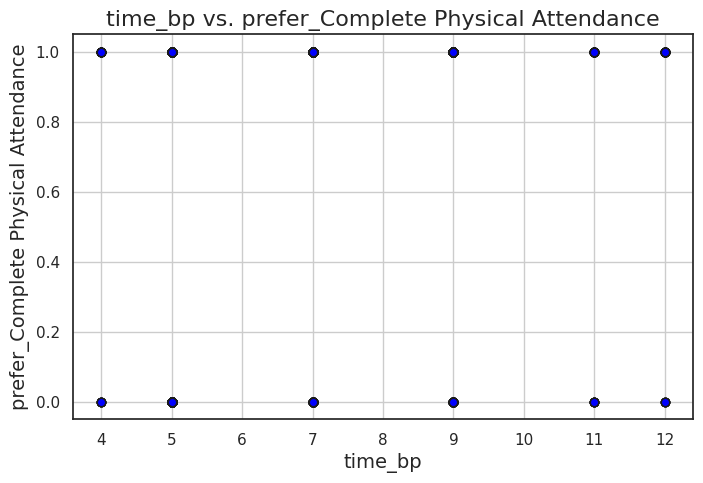

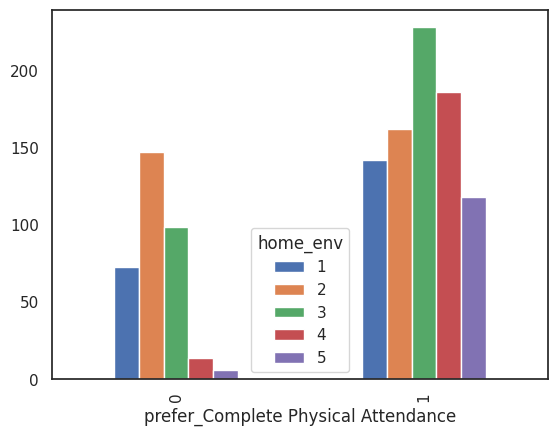

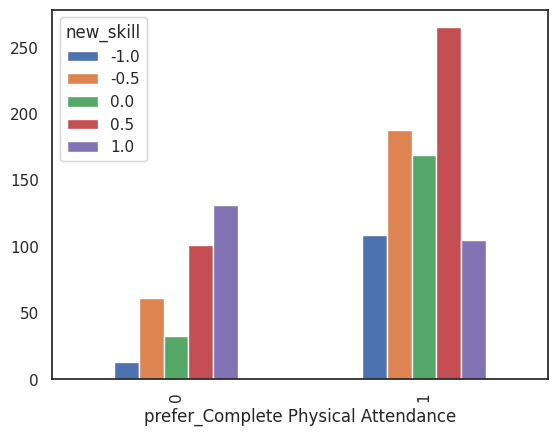

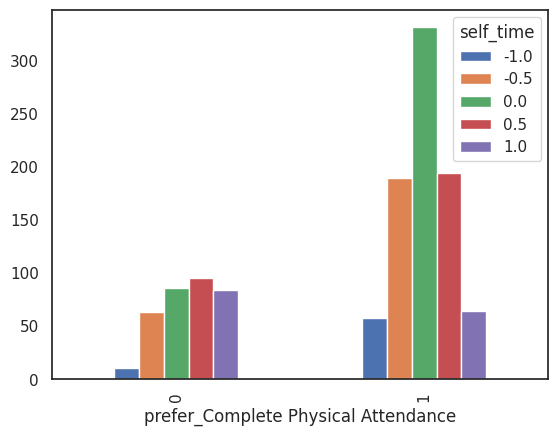

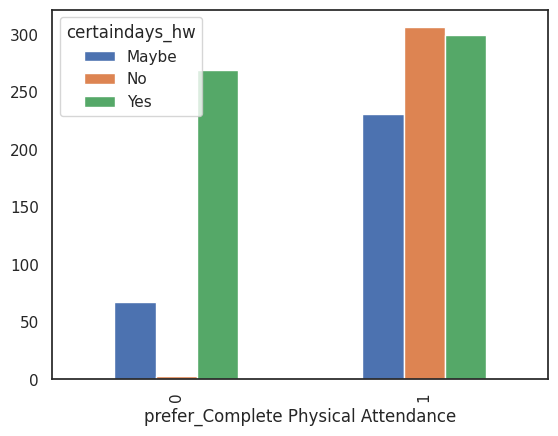

In [ ]:
for c in df.columns[1:]:
    if c == 'time_bp':
        plt.figure(figsize=(8,5))
        plt.title('{} vs. prefer_Complete Physical Attendance'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df['prefer_Complete Physical Attendance'], color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('prefer_Complete Physical Attendance', fontsize=14)
        plt.show()
    elif c == 'self_time' or c=='home_env' or c=='certaindays_hw' or c == 'new_skill':
        ct = pd.crosstab(df['prefer_Complete Physical Attendance'], df[c])
        ct.plot.bar()

In [ ]:
df_model = df[['prefer_Complete Physical Attendance',
               'time_bp', 'self_time_-1.0', 'self_time_-0.5',
               'self_time_0.5',  'self_time_1.0', #референтная гр self_time_0.0
                'certaindays_hw_No',	'certaindays_hw_Maybe',  #референтная гр certaindays_hw_Yes
                'new_skill_1.0', 'new_skill_0.5',
                'new_skill_-1.0', 'new_skill_-0.5', #референтная гр new_skill_0.0
                'home_env_1', 'home_env_2',
                'home_env_4', 'home_env_5']] #референтная гр home_env_3
df_model.shape

(1175, 16)

In [ ]:
x_mult = df_model[['time_bp', 'self_time_-1.0', 'self_time_-0.5',
               'self_time_0.5',  'self_time_1.0',
                'certaindays_hw_No',	'certaindays_hw_Maybe',
                'new_skill_1.0', 'new_skill_0.5',
                'new_skill_-1.0', 'new_skill_-0.5',
                'home_env_1', 'home_env_2',
                'home_env_4', 'home_env_5']]
y = df_model['prefer_Complete Physical Attendance'] # зависимая переменная
x_mult_constant = sm.add_constant(x_mult)

In [ ]:
model = sm.Logit(y, x_mult_constant).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                                    Logit Regression Results                                   
Dep. Variable:     prefer_Complete Physical Attendance   No. Observations:                 1175
Model:                                           Logit   Df Residuals:                     1159
Method:                                            MLE   Df Model:                           15
Date:                                 Sun, 25 Feb 2024   Pseudo R-squ.:                     inf
Time:                                         11:53:18   Log-Likelihood:                   -inf
converged:                                        True   LL-Null:                        0.0000
Covariance Type:                             nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

In [ ]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))

R^2 = inf
Model significance = 1.000000


In [ ]:
f'Статистически значимые предикторы: {model.pvalues[model.pvalues < 0.05].index.values}'

"Статистически значимые предикторы: ['const' 'time_bp' 'self_time_-0.5' 'self_time_1.0' 'certaindays_hw_No'\n 'certaindays_hw_Maybe' 'new_skill_1.0' 'new_skill_-0.5' 'home_env_1'\n 'home_env_4' 'home_env_5']"

In [ ]:
f'Статистически не значимые предикторы: {model.pvalues[model.pvalues > 0.05].index.values}'

"Статистически не значимые предикторы: ['self_time_-1.0' 'self_time_0.5' 'new_skill_0.5' 'new_skill_-1.0'\n 'home_env_2']"

In [ ]:
cm = model.pred_table()
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 254.0 | FN: 85.0
-------------------
FP: 76.0  | TN: 760.0


In [ ]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Точность (процент верно предсказанных событий): = {}'.format(accuracy))

Точность (процент верно предсказанных событий): = 0.8629787234042553


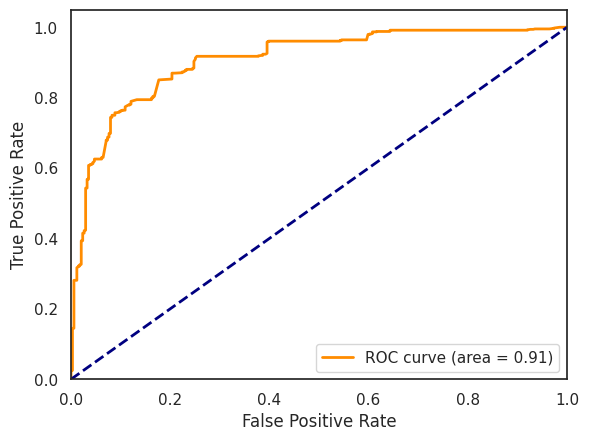

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(df_model['prefer_Complete Physical Attendance'], model.predict())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Площадь под кривой = 0.91 => качество модели мало и мы не станем использовать ее для проверки гипотез.



Оценка значимости регрессионных коэфикоэффициентов:

In [ ]:
coefs = pd.DataFrame()
coefs['Coefs'] = model.params[1:]
coefs['Features'] = model.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model.params[0])

Intercept =  -1.6973648934313716


In [ ]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs

,Coefs,OddsRatio
Features,,
time_bp,0.341608,1.407209
self_time_-1.0,-0.249672,0.779056
self_time_-0.5,-1.586261,0.204689
self_time_0.5,-0.310253,0.733261
self_time_1.0,-2.232672,0.107242
certaindays_hw_No,5.462435,235.670547
certaindays_hw_Maybe,1.674194,5.334492
new_skill_1.0,-1.617014,0.198491
new_skill_0.5,-0.480933,0.618206



*   **free_time_dif** Увеличение времени работы до пандемии на час увеличивает вероятность желания работать в офисе на 34%
*   **self_time_-1.0** Статистически не значимо
*   **self_time_-0.5** Люди, у которых времени на себя стало немного меньше в 0.2 раза больше хотят работать в офисе(т.е. меньше хотят работать в офисе) по сравнению с теми, у кого время на себя не изменилось
*   **self_time_0.5** Статистически не значимо
*   **self_time_1.0** Люди, у которых времени на себя стало сильно больше в 0.1 раза больше хотят работать в офисе(т.е. меньше хотят работать в офисе) по сравнению с теми, у кого время на себя не изменилось
*   **certaindays_hw_No** Люди, которые не хотят иногда работать из дома в 235 раз больше хотят работать в офисе по сравнению с теми, кто хочет иногда работать из дома
*   **certaindays_hw_Maybe** Люди, которые может быть хотят иногда работать из дома в 5 раз больше хотят работать в офисе по сравнению с теми, кто точно хочет ногда работать из дома.
*   **new_skill_1.0** Люди, которые преобрели много новых навыков, в 0.19 раза больше хотят работать в офисе(т.е. меньше хотят работать в офисе) по сравнению с теми, навыки кого не изменились.
*   **new_skill_0.5** Статистически не значимо
*   **new_skill_-1.0** Статистически не значимо
*   **new_skill_-0.5** Люди, которые потеряли немного новых навыков, в 0.48 раза больше хотят работать в офисе(т.е. меньше хотят работать в офисе) по сравнению с теми, навыки кого не изменились.
*   **home_env_1** Люди, которым не нравится обстановка дома в 0.48 раза больше хотят работать в офисе(т.е. меньше хотят работать в офисе) по сравнению с теми, кому немного нравится обстановка дома.
*   **home_env_2** Статистически не значимо
*   **home_env_4** Люди, которым нравится обстановка дома в 6.9 раза больше хотят работать в офисе по сравнению с теми, кому немного нравится обстановка дома.
*   **home_env_5** Люди, которым очень нравится обстановка дома в 19 раз больше хотят работать в офисе по сравнению с теми, кому немного нравится обстановка дома.

**Кластерный анализ:**

 Анализ будет проведен с использованием **метода k-средних**, т.к. выборка достаточно большого размера.

Для кластерного анализа можно использовать только три переменных: time_dp, time_bp и travel_time, так как коэф корреляции между ними меньше 0.5

free_time_dif использовать нельзя, так как ее коэф корреляции со всеми остальными метрическими переменными кроме time_bp больше 0.5 и она была получена на их основе.

In [ ]:
# Стандартизируем значения переменных
df['z_time_bp'] = (df['time_bp'] - df['time_bp'].mean())/df['time_bp'].std()
df['z_time_dp'] = (df['time_dp'] - df['time_dp'].mean())/df['time_dp'].std()
df['z_travel_time'] = (df['travel_time'] - df['travel_time'].mean())/df['travel_time'].std()
X = df[['z_time_bp', 'z_time_dp', 'z_travel_time']]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
for k in range (2, 20):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))

Число кластеров: 2, индекс 532.0618116865354
Число кластеров: 3, индекс 612.310563123215
Число кластеров: 4, индекс 661.5095200080511
Число кластеров: 5, индекс 685.1096921553758
Число кластеров: 6, индекс 713.99203869595
Число кластеров: 7, индекс 708.4592837195974
Число кластеров: 8, индекс 804.4713478492444
Число кластеров: 9, индекс 828.1480764588048
Число кластеров: 10, индекс 865.718527308487
Число кластеров: 11, индекс 903.807922925665
Число кластеров: 12, индекс 980.2878279164087
Число кластеров: 13, индекс 1010.3664208239439
Число кластеров: 14, индекс 1054.0044826278513
Число кластеров: 15, индекс 1118.1698063346776
Число кластеров: 16, индекс 1173.464650678567
Число кластеров: 17, индекс 1218.3344459572909
Число кластеров: 18, индекс 1265.6787903296256
Число кластеров: 19, индекс 1387.1411839199957


Индекс максимален при максимальном количесиве кластеров, которое рассматривается, однако такое большое число кластеров не удобно для анализа, котому возьмём первый локальный максимум - при 6 кластерах

In [ ]:
kmeans_model = KMeans(n_clusters=6).fit_predict(X)
kmeans_model

array([3, 4, 5, ..., 1, 2, 3], dtype=int32)

In [ ]:
df['Clusters'] = kmeans_model
df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,...,certaindays_hw_Yes,home_env_1,home_env_2,home_env_3,home_env_4,home_env_5,z_time_bp,z_time_dp,z_travel_time,Clusters
0,19-25,Male,Student in College,7,5,0.5,3,3,0.0,0.0,...,1,0,0,1,0,0,-0.207102,-1.118520,-0.739730,3
1,0-18,Male,Student in School,7,11,0.5,4,2,-0.5,0.5,...,0,0,1,0,0,0,-0.207102,1.139660,-0.739730,4
2,19-25,Male,Student in College,7,7,1.5,2,2,1.0,0.0,...,1,0,1,0,0,0,-0.207102,-0.365793,0.662177,5
3,19-25,Male,Student in College,7,7,1.5,3,1,0.0,1.0,...,1,1,0,0,0,0,-0.207102,-0.365793,0.662177,5
4,19-25,Female,Student in College,7,7,1.5,2,2,0.0,0.0,...,1,0,1,0,0,0,-0.207102,-0.365793,0.662177,5


In [ ]:
df['Clusters'].value_counts()

3    308
1    293
5    196
2    156
0    121
4    101
Name: Clusters, dtype: int64

В 3-й кластер попало больше случаев, чем в остальные, но разброс в количестве наблюдей в кластерах достаточно небольшой

In [ ]:
df.groupby('Clusters')[['time_bp', 'time_dp', 'travel_time']].mean()

,time_bp,time_dp,travel_time
Clusters,,,
0,8.247934,5.024793,1.607438
1,8.587031,9.354949,0.500000
2,10.301282,10.717949,2.125000
3,6.110390,5.230519,0.516234
4,5.336634,11.386139,0.500000
5,5.974490,8.086735,1.660714


In [ ]:
df.groupby('Clusters')[['z_time_bp', 'z_time_dp', 'z_travel_time']].mean()

,z_time_bp,z_time_dp,z_travel_time
Clusters,,,
0,0.415189,-1.109188,0.812796
1,0.584282,0.520523,-0.739730
2,1.439106,1.033506,1.538369
3,-0.650713,-1.031761,-0.716971
4,-1.036552,1.284988,-0.739730
5,-0.718480,0.043214,0.887484


In [ ]:
df[['time_bp', 'time_dp', 'travel_time']].mean()

time_bp        7.415319
time_dp        7.971915
travel_time    1.027660
dtype: float64

**Кластер 0: Интроверты** (Время работы до пандемии было намного ниже среднего, во время падемии оно стало намного больше среднего, при этом значения в среднем возрасли в 2 раза. Время на дорогу до работы минимально.)

**Кластер 1: Расслабились** (Время работы до пандемии было примерно на уровне среднего, во время падемии оно стало меньше среднего. Время на дорогу до работы примерно на уровне среднего.)

**Кластер 2: Продуктивные** (Время работы до пандемии и вовремя пандемии немного больше среднего, при этом в среднем время работы во время пандемии немного возрасло. Время на дорогу до работы минимально.)

**Кластер 3: Исправившиеся** (Время работы до пандемии было намного ниже среднего, во время падемии оно стало примерно на уровне среднего. Время на дорогу до работы примерно на уровне среднего.)

**Кластер 4: Лентяи** (Время работы до пандемии и во время падемии сильно меньше среднего. При этом во время пандемии в среднем время работы увеличилось. Время на дорогу до работы минимально.)

**Кластер 5: Трудоголики** (Время работы до пандемии и во время падемии сильно выше среднего. При этом во время пандемии в среднем время работы уменьшилось. Время на дорогу до работы выше среднего - наибольше из всех клсатерров.)

**Итоги:**
Нами был проведен графический и регрессионный анализы данных, построены сводные таблицы, рассчитаны корреляции и описательные статистики. Мы построили модели линейной и бинарной регрессии, а также провели кластерный анализ.

Все гипотезы были проверены:

Гипотеза Н1 подтверждена.

Гипотеза Н2 подтверждена.

Гипотеза Н3 подтверждена

Гипотеза Н4 подтверждена.

Гипотеза Н5 опровергнута.

Гипотеза Н6 опровергнута.

Гипотеза Н7 опровергнута.

Гипотеза Н8 подтверждена.

Гипотеза Н9 подтверждена.

Гипотеза Н10 опровергнута.

По итогам исследования мы можем утверждать, что влияние пандемии и локдауна на состояние человека во многом определяется его домашней обстановкой, а на его работоспособность в это время могут влиять такие факторы, как уделяемое себе время, отношение в семье и время работы до начала пандемии.

Самыми неожиданными для нас оказались выводы относительно того, что большинство людей хочет работать оффлайн вне зависимости от удаленности дома от места работы и что меньше всех работать из доима нравится домохозяйкам.

Наиболее ожидаемым оказался вывод о том, что увеличение уровня продуктивности ведет к появлению у человека новых навыков.

# Часть 2

Соберем данные о лучших комедиях к 1 апреля по версии сервиса Иви.

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv


def get_film_info(url):
    data = []
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    search_results = soup.find_all('li', {'class': 'gallery__item gallery__item_virtual'})
    for page in search_results:
      if page.a:
        movie_info = {}
        link = requests.get('https://www.ivi.ru/' + page.a['href'])
        soup = BeautifulSoup(link.text, 'html.parser')

        title = soup.find('div', {'class': "watchTitle contentCard__watchTitle"})
        if title:
          movie_info['Movie name'] = title.text

        year = soup.find('a', {'class': "nbl-link nbl-link_style_wovou"})
        if year:
          movie_info['Year'] = year.text

        params = soup.find_all('a', {'class': "nbl-link nbl-link_style_wovou"})
        if len(params) > 1:
          country = params[1].text
          if country:
            movie_info['Country'] = country

        params = soup.find_all('div', {'class': "nbl-link nbl-link_style_wovou nbl-link nbl-link_noLink"})
        if len(params) > 0:
          duration = params[0].text
          if duration:
            movie_info['Duration'] = duration

        if len(params) > 1:
          age = params[1].text
          if age:
            movie_info['Age rate'] = age

        rating = soup.find('div', {'class': "nbl-ratingPlate__value"})
        if rating:
          movie_info['IVI Rating'] = rating.text

        description = soup.find('div', {'class': "clause__text-inner hidden-children"})
        if description:
          movie_info['Description'] = description.text

        languages = soup.find('div', {'class': "watchOptions__values"})
        if languages:
          movie_info['Available languages'] = languages.text

        first_name = soup.find('div', {'class': "fixedSlimPosterBlock__title"})
        last_name = soup.find('div', {'class': "fixedSlimPosterBlock__secondTitle"})
        if first_name and last_name:
          movie_info['Director'] = first_name.text + " " + last_name.text

        actors = ""
        cast = soup.find_all('a', {'class': "nbl-medallion nbl-medallion_size_cobra watchMedallions__nbl-medallion"})
        if cast:
          for c in cast:
            actors+= c.text
            actors += ", "
          movie_info['Cast'] = actors[:-1]

        plt = ""
        plot = soup.find_all('div', {'data-test': "plot_text"})
        if plot:
          for p in plot:
            plt += p.text
            plt += " "
          movie_info['Plot'] = plt[:-1]
        data.append(movie_info)
    return data
movies = []
for i in range(1, 8):
    url = f'https://www.ivi.ru/collections/reason-to-smile/page{i}'
    movies += get_film_info(url)

df = pd.DataFrame(movies)
df.to_excel('movies.xlsx', sheet_name='MoviesInfo')

In [ ]:
df.head()

,Movie name,Year,Country,Duration,Age rate,IVI Rating,Description,Available languages,Director,Cast,Plot
0,1+1 (Фильм 2011),2011,Франция,1 ч. 52 мин.,18+,"9,0",Прикованный к инвалидному креслу аристократ на...,"Русский, Французский",Оливье Накаш,"Франсуа Клюзе, Омар Си, Анн Ле Ни, Одри Флеро,...","Дрисс, чернокожий парень из французского приго..."
1,Няньки (Фильм 1994),1994,США,1 ч. 28 мин.,16+,"8,5","Очаровательная комедия, о двух близнецах-бодиб...",Русский,Джон Парагон,"Джон Парагон, Питер Пол, Дэвид Пол, Кристиан К...","Два симпатичных амбала Питер и Дэвид, похожие ..."
2,Мистер и миссис Смит (Фильм 2005),2005,США,1 ч. 59 мин.,18+,"8,4",Брэд Питт и Анджелина Джоли в комедийном боеви...,"Русский, Английский",Даг Лайман,"Брэд Питт, Анджелина Джоли, Винс Вон, Адам Бро...","Джон и Джейн Смиты женаты уже около 5 лет, но ..."
3,Батя (Фильм 2021),2021,Россия,1 ч. 16 мин.,18+,"8,2","Детство Макса пришлось на 90-е, а его воспитан...",Русский,Дмитрий Ефимович,"Владимир Вдовиченков, Андрей Андреев, Стас Ста...",Сюжет фильма «Батя» (2021) рассказывает о мале...
4,Приключения Паддингтона (Фильм 2014),2014,Великобритания,1 ч. 31 мин.,6+,"8,5",Давний конкурент Винни-Пуха за любовь сначала ...,"Русский, Английский",Пол Кинг,"Бен Уишоу, Николь Кидман, Хью Бонневилль, Салл...","В Дремучем Перу живут добрые, умные, говорящие..."


In [ ]:
print("Число строк в датасете: ", df.shape[0])
print("Число столбцов в датасете: ", df.shape[1])

Число строк в датасете:  190
Число столбцов в датасете:  11


**Значения переменных:**

*Movie name* - название фильма

*Year* - год выхода

*Country* - страна происхождения

*Duration* - продолжительность фильма

*Age rate* - возрастное ограничение

*IVI rating* - рейтинг на ИВИ

*Description*- краткое описание фильма

*Available language*s - языки, доступные на ИВИ

*Director* - режисер

*Cast* - актерский состав

*Plot* - сюжет